# Table of Contents
1. [Feature Engineering](#feature-Engineering)
2. [EDA](#EDA)
    * [Determining the Use of Raw or Scaled Columns/Datasets](#determining-the-use-of-raw-or-scaled-columnsdatasets)
3. [Feature Engineering](#feature-engineering)
4. [Cluster Models](#cluster-Models)
5. [Analysis of Cluster Models Results Comparation](#analysis-of-cluster-results-comparation)
6. [Conclusion](#conclusion)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# comple df
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
# Label
label = df['Product_Code']
# Dataframe RAW
dfr = df[df.columns[1:53]]
# Dataframe Normalized
dfn = df.drop(df.columns[0:55], axis=1) # this is a normalized data

# EDA

In [20]:
df.isnull().sum().value_counts()

0    107
Name: count, dtype: int64

In [21]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


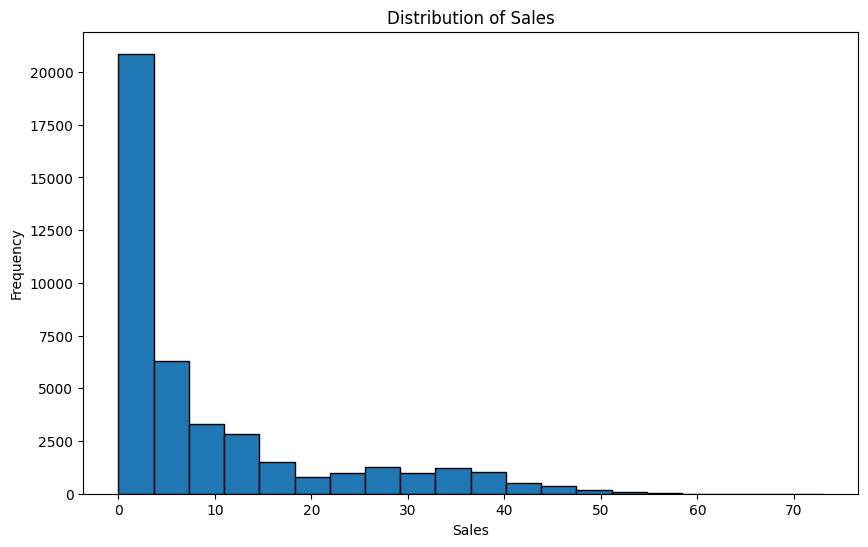

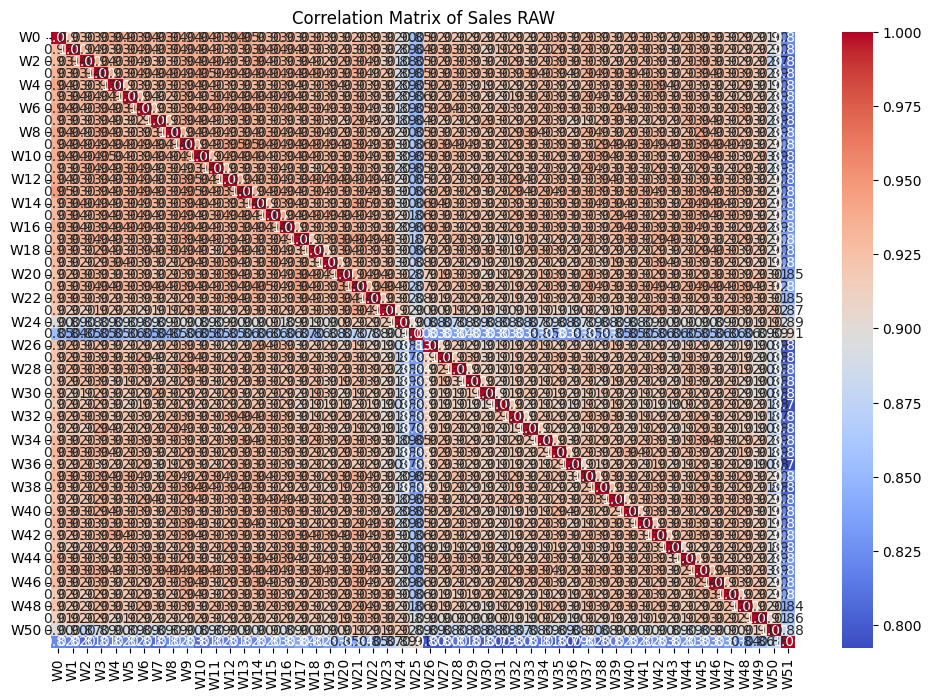

In [22]:
# Histogram of sales distribution
plt.figure(figsize=(10, 6))
plt.hist(dfr[dfr.columns].values.flatten(), bins=20, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = dfr[dfr.columns].corr()
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales RAW')
plt.show()


### Sales Each Week

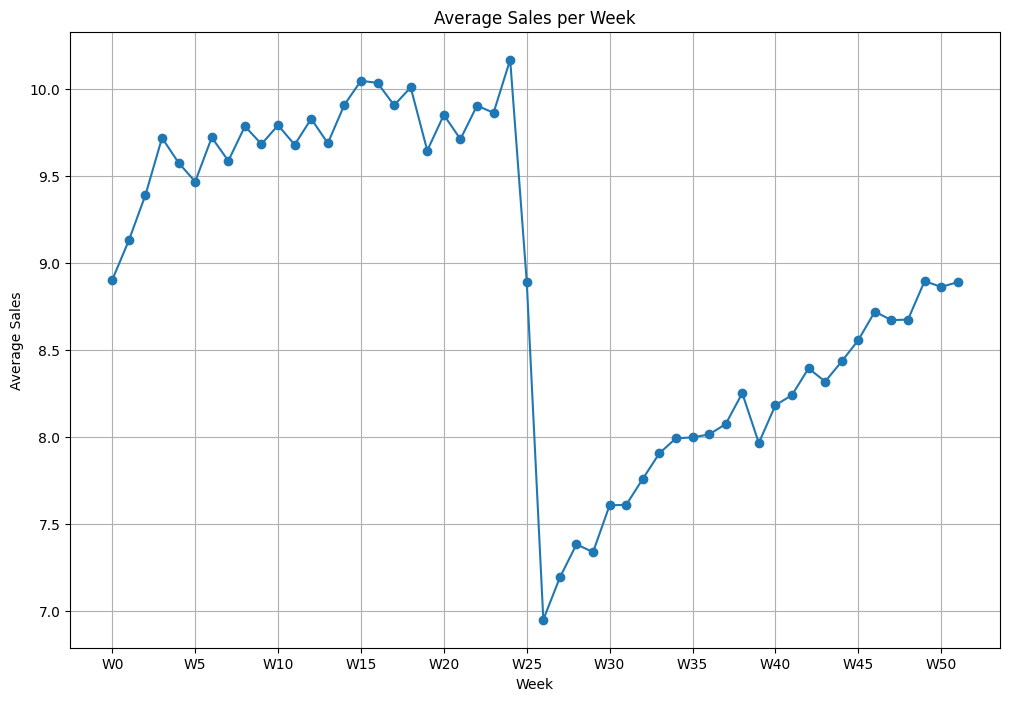

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(df[df.columns[1:53]].mean(), marker='o', linestyle='-')
plt.title('Average Sales per Week')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.xticks(range(0, 52, 5))  # Show every 5th week for clarity
plt.grid(True)
plt.show()


This might useful for knowing which product and why some high sales happened like in week 24 and drop significant at week 26, and getting  increase steadily afterwards.
We also can find the reasons of this happened, like its because of Trends or because the Shop itself have a strategy or a problem.

In [24]:
# Sort the DataFrame by sales in week 24
top_5_week_24_sales = df.sort_values(by='W24', ascending=False).head(5)

# Display the top 5 products
print("Top 5 products with the highest sales in week 24:")
print(top_5_week_24_sales[['Product_Code', 'W24']])


Top 5 products with the highest sales in week 24:
    Product_Code  W24
406         P409   64
261         P262   63
612         P615   50
175         P176   46
183         P184   45


The Product_code doesnt show any name of the product that might help for knowing what happened in that specific week.

### BoxPlot 


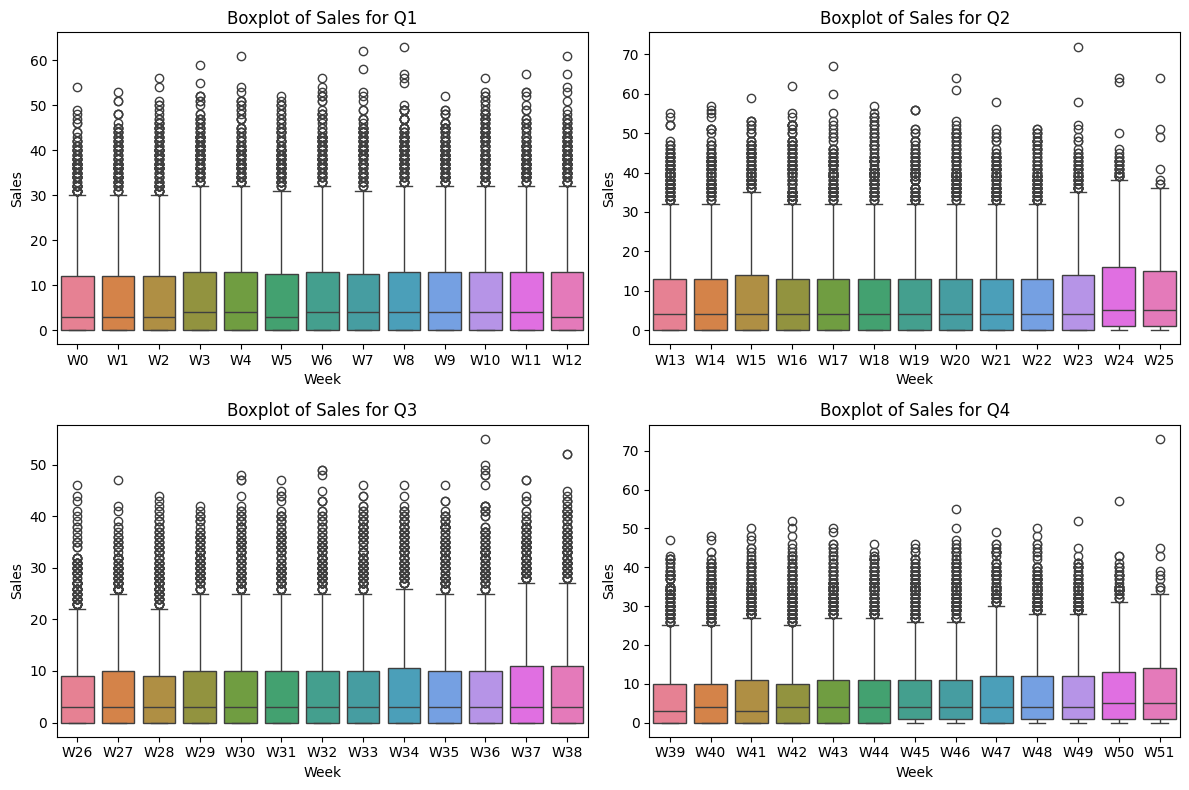

In [25]:
# Split the DataFrame into quarters
quarters = [df[df.columns[1:14]], df[df.columns[14:27]], df[df.columns[27:40]], df[df.columns[40:53]]]
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']

# Plot boxplots for each quarter
plt.figure(figsize=(12, 8))
for i, quarter in enumerate(quarters):
    plt.subplot(2, 2, i+1)
    sn.boxplot(data=quarter, orient='v')
    plt.title(f'Boxplot of Sales for {quarter_names[i]}')
    plt.ylabel('Sales')
    plt.xlabel('Week')

plt.tight_layout()
plt.show()


### Seasonal Decomposition

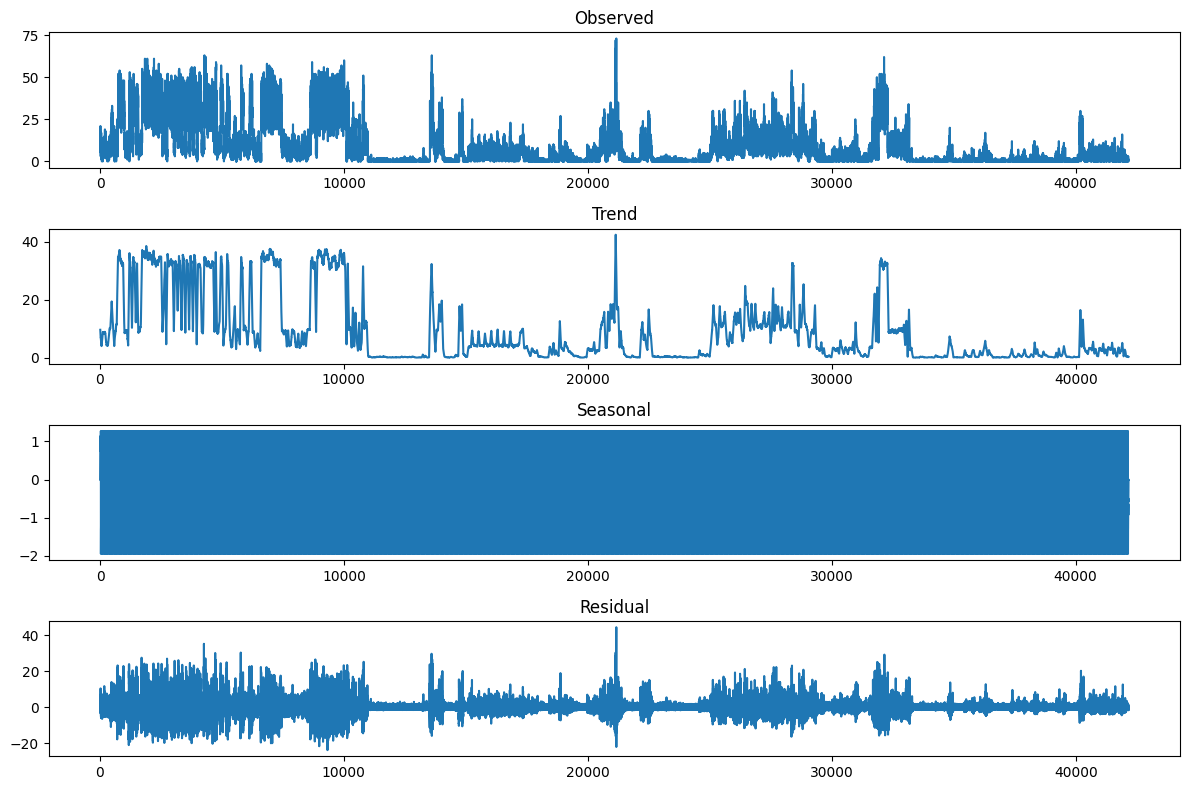

In [26]:
import statsmodels.api as sm

# Assuming 'sales' is your time series data
sales = dfr[dfr.columns].values.flatten()

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(sales, model='additive', period=52)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


#  Feature Engineering

## Rolling Statistic

In [27]:
# Set 'Product_Code' column as index
# df.set_index('Product_Code', inplace=True)

# Calculate rolling statistics (e.g., rolling mean) for a specific window size
window_size = 4  # Adjust the window size as needed

# Calculate rolling mean
rolling_mean = df.rolling(window=window_size, axis=1).mean()

# Calculate rolling sum
rolling_sum = df.rolling(window=window_size, axis=1).sum()

# Calculate rolling standard deviation
rolling_std = df.rolling(window=window_size, axis=1).std()

C:\Users\wirah\AppData\Local\Temp\ipykernel_2704\271378889.py:8: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_mean = df.rolling(window=window_size, axis=1).mean()
C:\Users\wirah\AppData\Local\Temp\ipykernel_2704\271378889.py:11: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_sum = df.rolling(window=window_size, axis=1).sum()
C:\Users\wirah\AppData\Local\Temp\ipykernel_2704\271378889.py:14: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_std = df.rolling(window=window_size, axis=1).std()


In [28]:
rolling_mean.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,NaN,NaN,NaN,10.25,10.75,10.75,11.75,15.00,13.25,13.75,...,0.3750,0.2350,0.2500,0.2375,0.3475,0.2925,0.2775,0.2225,0.1250,0.2225
1,NaN,NaN,NaN,4.50,4.50,3.25,4.00,4.25,3.25,3.75,...,0.3000,0.3250,0.4000,0.3000,0.2750,0.2750,0.2750,0.2750,0.4000,0.3000
2,NaN,NaN,NaN,8.75,9.50,8.75,8.50,9.50,10.00,9.50,...,0.2500,0.3625,0.4075,0.4075,0.4300,0.2925,0.4975,0.5650,0.5875,0.5650
3,NaN,NaN,NaN,9.50,8.75,8.25,7.25,9.25,10.25,11.50,...,0.3975,0.4275,0.2950,0.2650,0.2225,0.1925,0.3550,0.4125,0.4250,0.4250
4,NaN,NaN,NaN,9.25,8.75,9.25,8.25,9.00,9.75,10.25,...,0.2150,0.3150,0.3500,0.4175,0.4000,0.3175,0.2825,0.2650,0.2975,0.3475


In [29]:
rolling_sum.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,NaN,NaN,NaN,41.0,43.0,43.0,47.0,60.0,53.0,55.0,...,1.50,0.94,1.00,0.95,1.39,1.17,1.11,0.89,0.50,0.89
1,NaN,NaN,NaN,18.0,18.0,13.0,16.0,17.0,13.0,15.0,...,1.20,1.30,1.60,1.20,1.10,1.10,1.10,1.10,1.60,1.20
2,NaN,NaN,NaN,35.0,38.0,35.0,34.0,38.0,40.0,38.0,...,1.00,1.45,1.63,1.63,1.72,1.17,1.99,2.26,2.35,2.26
3,NaN,NaN,NaN,38.0,35.0,33.0,29.0,37.0,41.0,46.0,...,1.59,1.71,1.18,1.06,0.89,0.77,1.42,1.65,1.70,1.70
4,NaN,NaN,NaN,37.0,35.0,37.0,33.0,36.0,39.0,41.0,...,0.86,1.26,1.40,1.67,1.60,1.27,1.13,1.06,1.19,1.39


In [30]:
rolling_std.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,NaN,NaN,NaN,1.707825,2.217356,2.217356,2.629956,4.082483,6.184658,6.130525,...,0.311716,0.156098,0.157056,0.137689,0.123659,0.214690,0.217926,0.207585,0.094692,0.120381
1,NaN,NaN,NaN,2.380476,2.380476,2.629956,2.943920,2.753785,2.061553,1.500000,...,0.141421,0.150000,0.141421,0.182574,0.206155,0.206155,0.206155,0.206155,0.216025,0.294392
2,NaN,NaN,NaN,1.707825,1.290994,0.957427,1.290994,2.645751,2.943920,3.511885,...,0.229347,0.439574,0.397272,0.397272,0.389358,0.135000,0.353306,0.293087,0.275000,0.293087
3,NaN,NaN,NaN,3.696846,3.304038,3.593976,2.061553,2.872281,3.403430,1.914854,...,0.146373,0.145688,0.184481,0.205020,0.181177,0.128938,0.254624,0.205000,0.192094,0.192094
4,NaN,NaN,NaN,3.500000,3.862210,3.304038,2.217356,3.559026,2.986079,2.500000,...,0.101160,0.166032,0.123288,0.172699,0.194765,0.191202,0.214223,0.179722,0.175760,0.167008


## Determining the Use of Raw or Scaled Columns/Datasets

### RAW 

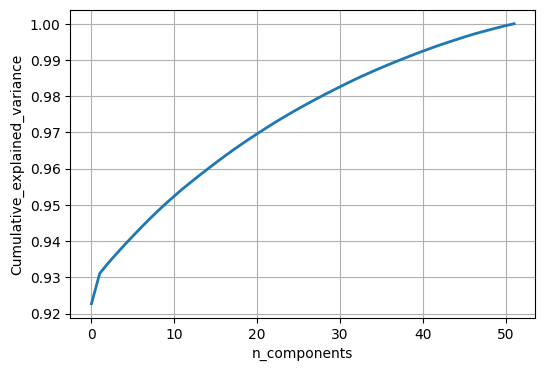

In [31]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 52

pca_data_pca = pca.fit_transform(dfr)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Using a statistical approach, in this raw data, the cumulative explained variance at 95% of the data is found in 8 components or variables, which is good. And if we use 99%, then the components that will be utilized are around 38.

### Normalized Data

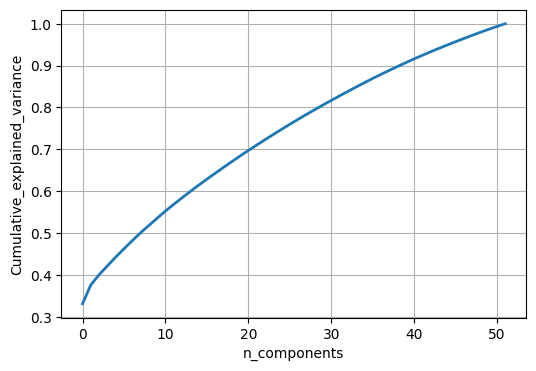

In [32]:
pca.n_components = 52

pca_data_pca = pca.fit_transform(dfn)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Unlike the previous raw data, in this normalized data, it is very poor. It can be seen that when the components are 8 (based on same treat to the previous raw data), the cumulative variance that can explain the data is only approximately 50%. Whereas, the raw data can achieve a cumulative variance of around 93% with just 2 components.

So, in this case, we find that the raw data is better to use.

Using amount of component that having 95% cumulative explained variance which is 8. To proceed to the next step of modelling.

In [33]:
import pandas as pd
from sklearn.decomposition import PCA

# Initialize PCA with 8 components
pca = PCA(n_components=8)

# Fit and transform the data
pca_data_pca = pca.fit_transform(dfr)

# Create a DataFrame from the transformed data
pca_df = pd.DataFrame(pca_data_pca, columns=[f'Component_{i}' for i in range(1, 9)])

# Display the DataFrame
pca_df


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8
0,5.321035,-8.340403,-2.020632,-5.318764,-4.558081,0.370784,-8.787378,-2.530446
1,-35.764069,-4.433337,-3.265881,-0.024874,-3.072818,4.760926,6.703532,-0.673080
2,-1.850250,-1.929244,3.182450,0.842373,4.501808,-3.421692,0.477105,-5.213519
3,-4.691024,-3.525798,1.325001,-2.214226,0.420209,-2.568552,6.776238,5.327036
4,-2.953761,1.351367,-7.413699,-1.298327,8.371662,-0.533586,-7.450726,-0.274986
...,...,...,...,...,...,...,...,...
806,-61.135625,-3.822774,-0.959452,-0.434624,-1.248224,1.133193,0.298388,0.399200
807,-45.655741,1.686877,2.765109,-0.507446,-2.482488,0.649182,0.752802,-0.624203
808,-60.929080,-1.374880,0.221395,-1.073995,0.205271,-0.658079,1.281885,-0.307975
809,-62.153931,-2.395216,0.681888,0.517487,0.431988,-0.193455,0.403216,-0.498146


# Cluster Models

## Hierarchical Clustering

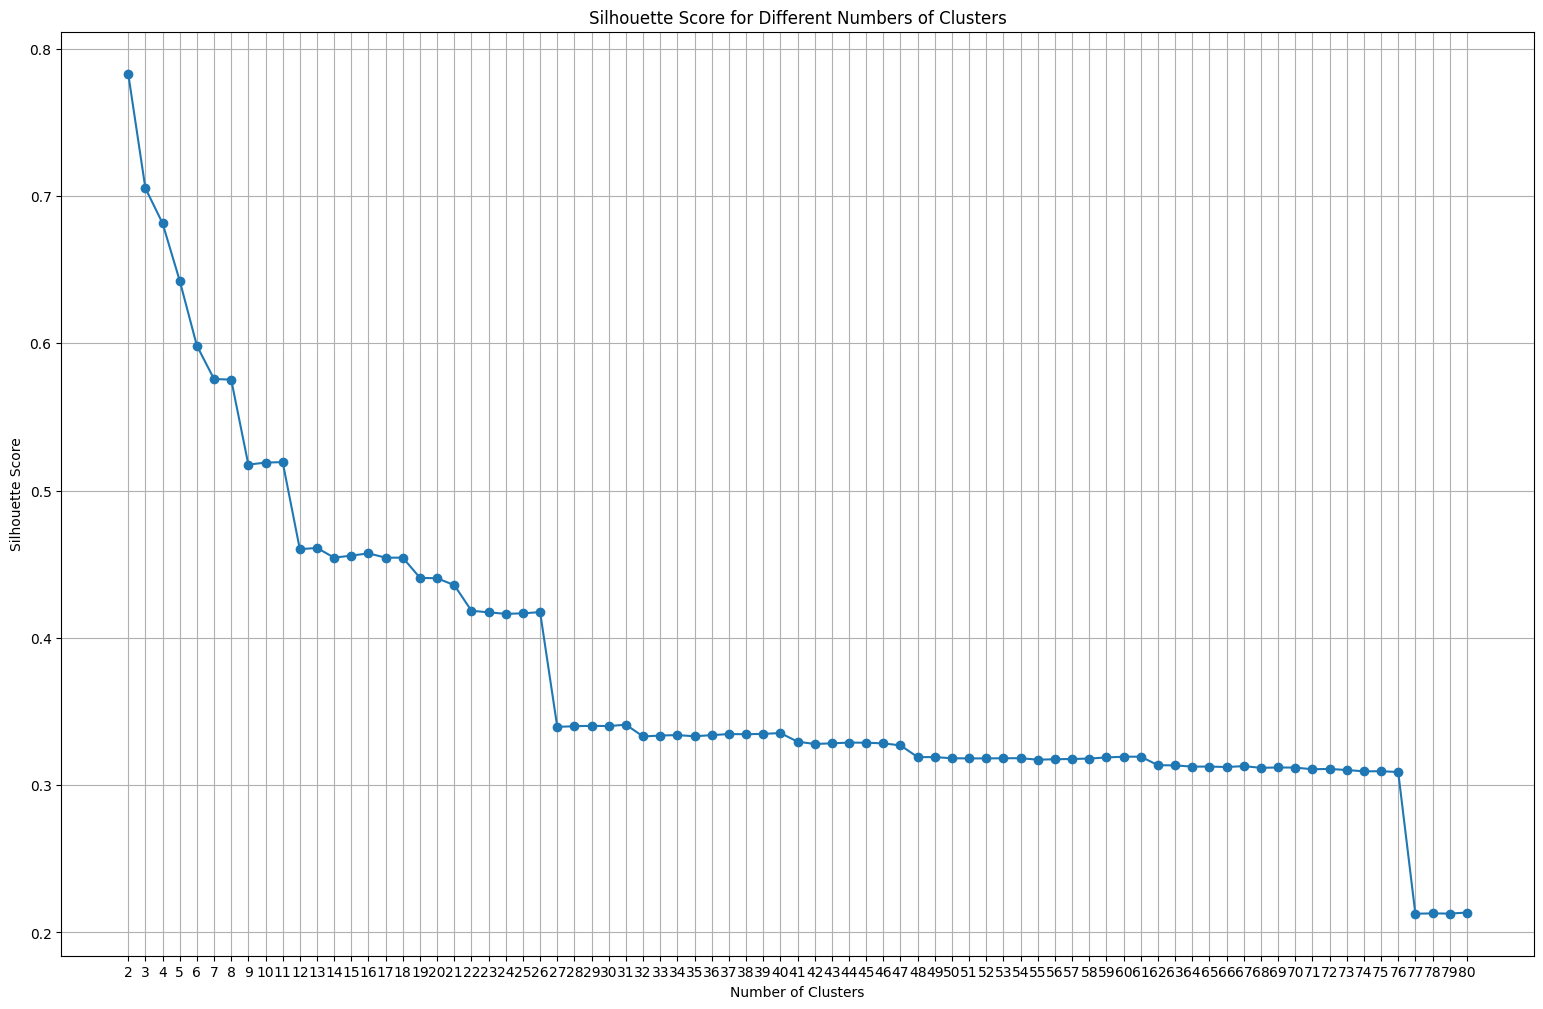

Lowest silhouette score: 0.21268013554432463
Number of clusters with lowest silhouette score: 77


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of cluster numbers to explore
min_clusters = 2
max_clusters = 80
cluster_range = range(min_clusters, max_clusters + 1)

# Initialize list to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize hierarchical clustering model
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the data and predict cluster labels
    clusters = clustering.fit_predict(pca_df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_df, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(19, 12))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Find the lowest silhouette score and its corresponding number of clusters
lowest_score = min(silhouette_scores)
lowest_score_index = silhouette_scores.index(lowest_score)
num_clusters_with_lowest_score = cluster_range[lowest_score_index]

# Print the lowest clustering silhouette score and its corresponding number of clusters
print(f'Lowest silhouette score: {lowest_score}')
print(f'Number of clusters with lowest silhouette score: {num_clusters_with_lowest_score}')


With relative sight, we can see that the optimal occurs when the cluster is 57. because the next amount of cluter just improve tiny bit score.

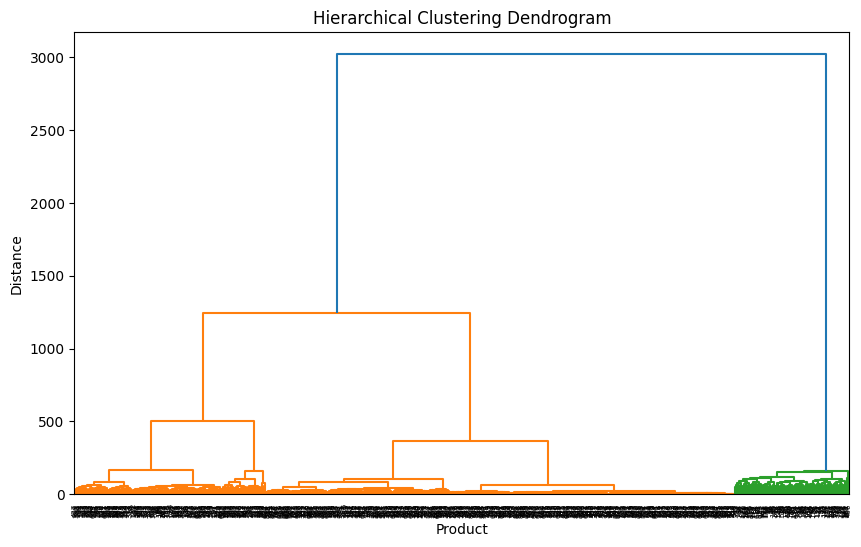

Cluster Assignments:
Product 0: Cluster 11
Product 1: Cluster 47
Product 2: Cluster 11
Product 3: Cluster 11
Product 4: Cluster 11
Product 5: Cluster 47
Product 6: Cluster 47
Product 7: Cluster 11
Product 8: Cluster 28
Product 9: Cluster 15
Product 10: Cluster 14
Product 11: Cluster 47
Product 12: Cluster 11
Product 13: Cluster 14
Product 14: Cluster 38
Product 15: Cluster 10
Product 16: Cluster 44
Product 17: Cluster 16
Product 18: Cluster 26
Product 19: Cluster 11
Product 20: Cluster 11
Product 21: Cluster 11
Product 22: Cluster 47
Product 23: Cluster 10
Product 24: Cluster 37
Product 25: Cluster 28
Product 26: Cluster 3
Product 27: Cluster 12
Product 28: Cluster 14
Product 29: Cluster 18
Product 30: Cluster 11
Product 31: Cluster 11
Product 32: Cluster 14
Product 33: Cluster 49
Product 34: Cluster 30
Product 35: Cluster 54
Product 36: Cluster 19
Product 37: Cluster 36
Product 38: Cluster 9
Product 39: Cluster 10
Product 40: Cluster 34
Product 41: Cluster 17
Product 42: Cluster 21
Pr

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Initialize hierarchical clustering model
n_clusters = 57  # Jumlah cluster yang ingin Anda temukan
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the hierarchical clustering model to the data
clusters = clustering.fit_predict(dfr)

# Visualize dendrogram
linked = linkage(dfr, 'ward')  # Metode penggabungan (linkage) 'ward' digunakan untuk meminimalkan varian dalam setiap cluster
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=dfr.index,  # Label tiap baris (misalnya, nama produk)
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Product')
plt.ylabel('Distance')
plt.show()

# Print cluster assignments
print("Cluster Assignments:")
for product, cluster in zip(dfr.index, clusters):
    print(f"Product {product}: Cluster {cluster}")


In [36]:
dfr.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


## Density Based

C:\Users\wirah\AppData\Local\Temp\ipykernel_2704\1928609578.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Cluster'] = clusters
C:\Users\wirah\AppData\Local\Temp\ipykernel_2704\1928609578.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


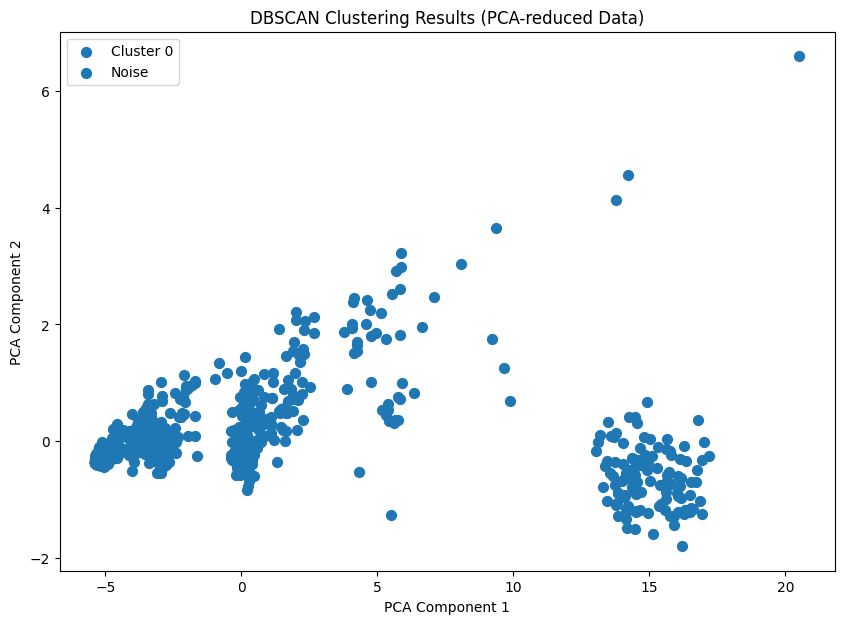

In [48]:
scaler = StandardScaler()
dfr_scaled = scaler.fit_transform(dfr)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)
clusters = dbscan.fit_predict(dfr_scaled)

# Step 4: Add the cluster labels to the DataFrame
dfr['Cluster'] = clusters

# Step 5: Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
dfr_pca = pca.fit_transform(dfr_scaled)

# Step 6: Plot the clustering results
plt.figure(figsize=(10, 7))
unique_clusters = set(clusters)
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    plt.scatter(dfr_pca[clusters == cluster, 0], dfr_pca[clusters == cluster, 1], 
                s=50, c=[colors(cluster)], label=label)

plt.title('DBSCAN Clustering Results (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## K-Means

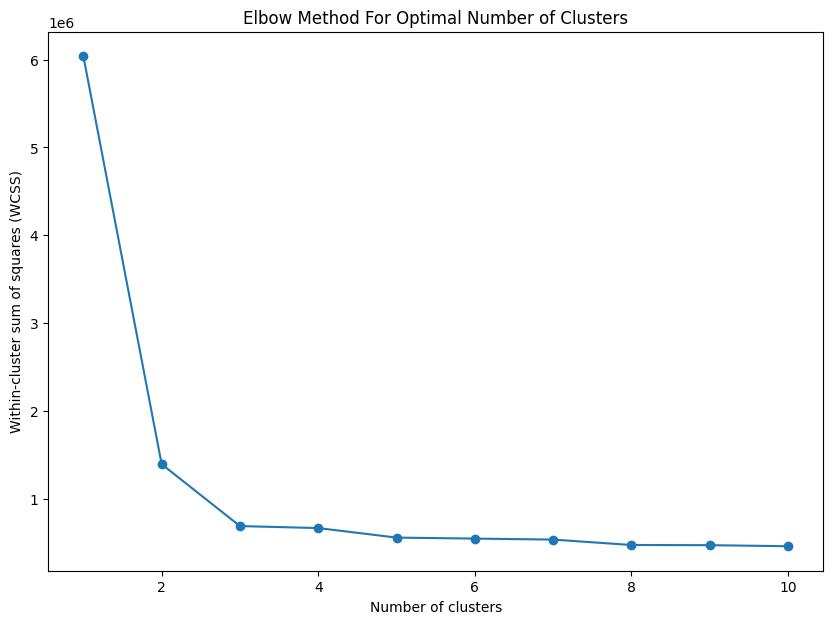

In [51]:
# Step 3: Create an elbow plot to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dfr)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()  

From relative view to find the elbow we can see that elbow occurs when the clusters is 3 

# Analysis of Cluster Results Comparation 

# Conclusion